# Exploration of biased 'nu' parameter posteriors in Roaster

**February 2, 2017**

When running Roaster on our simulated GREAT3-like galaxy images for the shear bias study we find the marginal posterior for the Spergel profile $\nu$ parameter is consistently biased.

See, for example, the corner plot from the first galaxy in the first field of our study:
![MagicBeans/devel/shear_bias_test_167/reaper/JIF/000/roaster_000_seg0_LSST_roaster_inspector_triangle.png](img/roaster_000_seg0_LSST_roaster_inspector_triangle.png)

In this notebook we explore further why this bias might be occurring.

## Exponential vs Spergel profiles

In [1]:
import os.path
import numpy as np
import galsim
import jif
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [32]:
gal_spergel = galsim.Spergel(nu=0.5, half_light_radius=0.8, flux=10000.0)
gal_sersic = galsim.Sersic(n=1, half_light_radius=0.8, flux=10000.0)

psf = galsim.Gaussian(flux=1., sigma=0.7)

final_spergel = galsim.Convolve([gal_spergel, psf])
final_sersic = galsim.Convolve([gal_sersic, psf])

n = 64
image_spergel = final_spergel.drawImage(scale=0.2, nx=n, ny=n)
image_sersic = final_sersic.drawImage(scale=0.2, nx=n, ny=n)

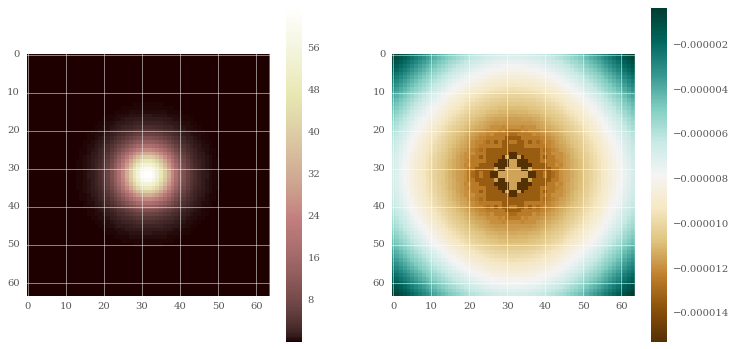

In [33]:
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_spergel.array,
           interpolation='none', cmap=plt.cm.pink)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image_spergel.array - image_sersic.array, 
           interpolation='none', cmap=plt.cm.BrBG)
plt.colorbar()

## Comparison of model images with true and MAP 'nu' values

In [51]:
gal_true = galsim.Spergel(nu=0.5, half_light_radius=0.8, flux=10000.0)
gal_map = galsim.Spergel(nu=0.35, half_light_radius=0.8, flux=10030.0)

psf = galsim.Gaussian(flux=1., sigma=0.7)

final_true = galsim.Convolve([gal_true, psf])
final_map = galsim.Convolve([gal_map, psf])

n = 64
image_true = final_true.drawImage(scale=0.2, nx=n, ny=n)
image_map = final_map.drawImage(scale=0.2, nx=n, ny=n)

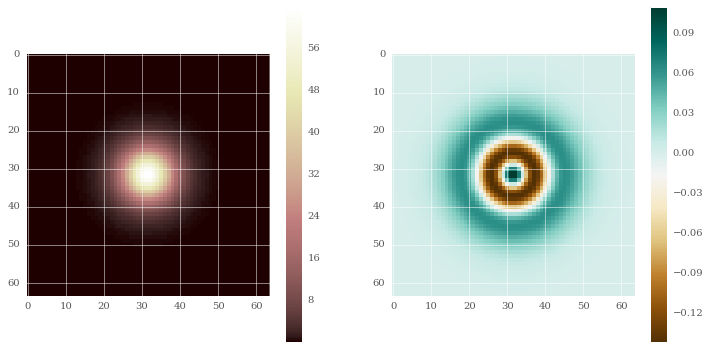

In [52]:
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_true.array,
           interpolation='none', cmap=plt.cm.pink)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image_map.array - image_true.array, 
           interpolation='none', cmap=plt.cm.BrBG)
plt.colorbar()

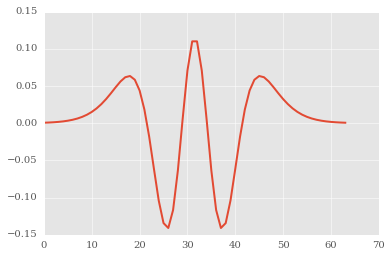

In [53]:
plt.plot((image_map.array - image_true.array)[(n/2),:])

In [5]:
sim_dir = "../../../../MagicBeans/devel/shear_bias_test_167/"
truth_catalog = os.path.join(sim_dir, "control/ground/constant/epoch_catalog-000-0.fits")

In [6]:
f = fits.open(truth_catalog)
tcat = f[1].data
f.close()

In [14]:
print tcat.columns
print tcat[0]

ColDefs(
    name = 'num'; format = 'J'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'dx'; format = 'D'
    name = 'dy'; format = 'D'
    name = 'psf_e1'; format = 'D'
    name = 'psf_e2'; format = 'D'
    name = 'psf_fwhm'; format = 'D'
    name = 'g1'; format = 'D'
    name = 'g2'; format = 'D'
    name = 'gal_e1'; format = 'D'
    name = 'gal_e2'; format = 'D'
)
(0, 24.5, 24.5, -0.98060578946024179, -0.41024529468268156, 0.0, 0.0, 0.69999999999999996, 0.0014178461995583019, -0.041486870981251006, 0.0019704378462152999, -0.0030702104754297879)


## Posterior distributions with Roaster

In [3]:
gg = jif.GalSimGalaxyModel(galaxy_model="Spergel",
                           telescope_model="LSST",
                           psf_model="Model")

noise = jif.telescopes.lsst_noise(random_seed=58979832601)

In [4]:
gg.save_footprint("test.h5", noise=noise)